In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 1. Correlation


In this exercise, we will investigate the correlation present in astronomical data observed by Edwin Hubble in the period surrounding 1930.

Hubble was interested in the motion of distant galaxies. He recorded the apparent velocity of these galaxies – the speed at which they appear to be receding away from us – by observing the spectrum of light they emit, and the distortion thereof caused by their relative motion to us. He also determined the distance of these galaxies from our own by observing a certain kind of star known as a Cepheid variable which periodically pulses. The amount of light this kind of star emits is related to this pulsation, and so the distance to any star of this type can be determined by how bright or dim it appears.

The following figure shows his data. The Y-axis is the apparent velocity, measured in kilometers per second. Positive velocities are galaxies moving away from us, negative velocities are galaxies that are moving towards us. The X-axis is the distance of the galaxy from us, measured in mega-parsecs (Mpc); one parsec is 3.26 light-years, or 30.9 trillion kilometers.


In [3]:
Xs = np.array(
    [
        0.0339,
        0.0423,
        0.213,
        0.257,
        0.273,
        0.273,
        0.450,
        0.503,
        0.503,
        0.637,
        0.805,
        0.904,
        0.904,
        0.910,
        0.910,
        1.02,
        1.11,
        1.11,
        1.41,
        1.72,
        2.03,
        2.02,
        2.02,
        2.02,
    ]
)

Ys = np.array(
    [
        -19.3,
        30.4,
        38.7,
        5.52,
        -33.1,
        -77.3,
        398.0,
        406.0,
        436.0,
        320.0,
        373.0,
        93.9,
        210.0,
        423.0,
        594.0,
        829.0,
        718.0,
        561.0,
        608.0,
        1.04e3,
        1.10e3,
        840.0,
        801.0,
        519.0,
    ]
)

N = 24

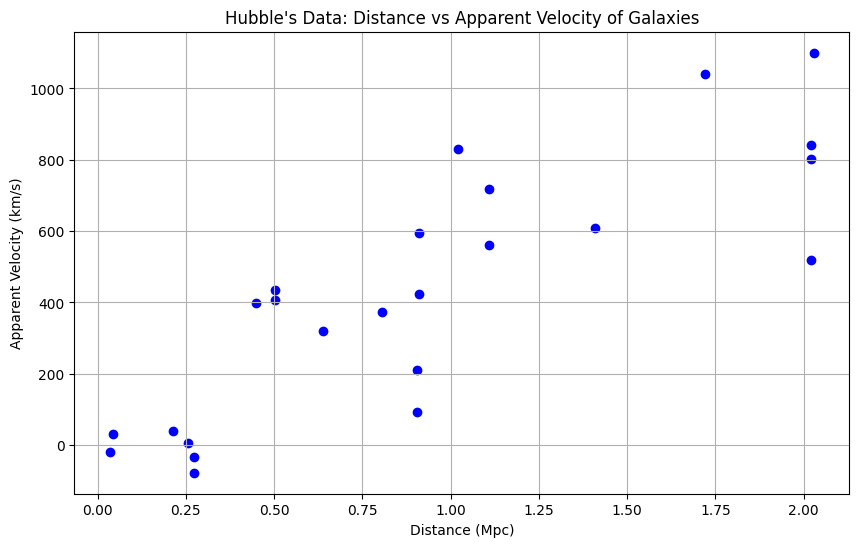

In [6]:
# Step 1: Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(Xs, Ys, color="blue")
plt.title("Hubble's Data: Distance vs Apparent Velocity of Galaxies")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Apparent Velocity (km/s)")
plt.grid(True)
# plt.show()

In [8]:
# Calculate the sample means
N = len(Xs)
mean_X = np.mean(Xs)
mean_Y = np.mean(Ys)

mean_X, mean_Y

(0.9199250000000001, 425.6175)

In [9]:
# Calculate the sample standard deviations
std_X = np.std(Xs, ddof=1)
std_Y = np.std(Ys, ddof=1)

std_X, std_Y

(0.6533948258734996, 348.7336574977229)

To find the maximal value of the covariance between \(X\) and \(Y\), we can use the properties of covariance and the Cauchy-Schwarz inequality.

The covariance between \(X\) and \(Y\) is given by:

\[ s^2*{X,Y} = \frac{1}{N-1} \sum*{i=1}^N (X_i - \bar{X}) (Y_i - \bar{Y}) \]

The Cauchy-Schwarz inequality states that for any two real-valued sequences \(X_i\) and \(Y_i\):

\[ \left| \sum*{i=1}^N (X_i - \bar{X})(Y_i - \bar{Y}) \right| \leq \sqrt{\sum*{i=1}^N (X*i - \bar{X})^2 \sum*{i=1}^N (Y_i - \bar{Y})^2} \]

Dividing both sides by \(N-1\) to obtain the sample covariance:

\[ \left| s^2\_{X,Y} \right| \leq \sqrt{s_X^2 s_Y^2} \]

\[ \left| s^2\_{X,Y} \right| \leq s_X s_Y \]

The inequality achieves equality if and only if \(Y = \beta X + \alpha\) for some constants \(\beta\) and \(\alpha\), meaning \(X\) and \(Y\) are perfectly correlated (or anti-correlated if \(\beta\) is negative).

Therefore, the maximum value of the covariance occurs when \(X\) and \(Y\) are perfectly correlated, and it is:

\[ s^2\_{X,Y} = s_X s_Y \]

Thus, the maximal value of the sample covariance is:

\[ \boxed{s_X s_Y} \]


When \(X\) and \(Y\) are perfectly anti-correlated, the covariance reaches its minimum value. Perfect anti-correlation means that \(Y = -\beta X + \alpha\) for some constants \(\beta > 0\) and \(\alpha\).

Using the properties of covariance and the Cauchy-Schwarz inequality, we can determine the minimum value.

The Cauchy-Schwarz inequality states:

\[ \left| \sum*{i=1}^N (X_i - \bar{X})(Y_i - \bar{Y}) \right| \leq \sqrt{\sum*{i=1}^N (X*i - \bar{X})^2 \sum*{i=1}^N (Y_i - \bar{Y})^2} \]

Dividing both sides by \(N-1\) to obtain the sample covariance:

\[ \left| s^2\_{X,Y} \right| \leq s_X s_Y \]

This inequality achieves equality when \(Y = -\beta X + \alpha\), indicating perfect anti-correlation. In this case, the covariance is negative and equal to the product of the standard deviations of \(X\) and \(Y\).

Therefore, the minimal value of the covariance is:

\[ s^2\_{X,Y} = -s_X s_Y \]

Thus, the minimal value that the covariance can take when \(X\) and \(Y\) are perfectly anti-correlated is:

\[ \boxed{-s_X s_Y} \]


Covariance is a measure of how much two variables change together, and its units are derived from the units of the variables involved.

For our Hubble dataset:

- The units of \(X\) (distance) are mega-parsecs (Mpc).
- The units of \(Y\) (apparent velocity) are kilometers per second (km/s).

The covariance \( s^2\_{X,Y} \) is calculated as:

\[ s^2*{X,Y} = \frac{1}{N-1} \sum*{i=1}^N (X_i - \bar{X}) (Y_i - \bar{Y}) \]

In this formula:

- \( (X_i - \bar{X}) \) has units of Mpc.
- \( (Y_i - \bar{Y}) \) has units of km/s.

Therefore, the product \( (X_i - \bar{X})(Y_i - \bar{Y}) \) will have units of \( \text{Mpc} \times \text{km/s} \).

Since the covariance \( s^2\_{X,Y} \) is an average of these products, the units of the covariance will be:

\[ \text{Mpc} \times \text{km/s} \]

Thus, for our Hubble dataset, the units of the covariance \( s^2\_{X,Y} \) are:

\[ \boxed{\text{Mpc} \cdot \text{km/s}} \]


In [10]:
# Calculate the sample covariance
cov_XY = np.cov(Xs, Ys, ddof=1)[0, 1]

cov_XY

191.20706528260865

The correlation coefficient \( r\_{X,Y} \) normalizes the covariance by dividing it by the product of the standard deviations of \(X\) and \(Y\). This coefficient ranges between -1 and 1, making it easier to interpret the strength and direction of the relationship between the two variables.

### Formula for the Correlation Coefficient

\[ r*{X,Y} = \frac{s^2*{X,Y}}{s_X s_Y} \]

### Maximum and Minimum Possible Values

- The **maximum possible value** of \( r\_{X,Y} \) is **1**, which occurs when \(X\) and \(Y\) are perfectly positively correlated.
- The **minimum possible value** of \( r\_{X,Y} \) is **-1**, which occurs when \(X\) and \(Y\) are perfectly negatively correlated (or anti-correlated).

Therefore:

- The maximum possible value of \( r\_{X,Y} \) is \(\boxed{1}\).
- The minimum possible value of \( r\_{X,Y} \) is \(\boxed{-1}\).


In [12]:
# Calculate the correlation by definition
correlation_coefficient = cov_XY / (std_X * std_Y)
correlation_coefficient

0.8391399162310662

In [20]:
# Calculate the correlation by numpy
r = np.corrcoef(Xs, Ys)[0, 1]
r

0.8391399162310662

In [21]:
# Calculate beta_1
beta_1 = r * std_Y / std_X
beta_1

447.8705991409983

In [23]:
# Calculate intercept
intercept = mean_Y - beta_1 * mean_X
intercept

13.6101390852171

The value of \hat{\beta }\_1 that you found is known as the Hubble constant. Since Hubble's first discovery of this relationship, astronomers have expended considerable effort to refine the value of this constant.

Today, we now know that the original constant that Hubble derived (and also the one that you derived, as you used the original data), is too large by a factor of between 6 and 7. Unknown to Hubble at the time, there are two types of Cepheid variable stars, and the difference between them needs to be accounted for in order to accurately estimate the distance to other galaxies.

Even today, the matter of Hubble's constant is not settled, as measurements of the constant based on nearby galaxies disagrees with measurements based on the cosmic microwave background (which tells us about the early universe, and thus much greater distances). Hubble's constant is critical to understanding the geometry of space-time in our universe, and so work continues to resolve this discrepancy!


## Recitation


(0.8391399162310662, 447.87059914099837, 13.610139085217043, 0.704155799012281)

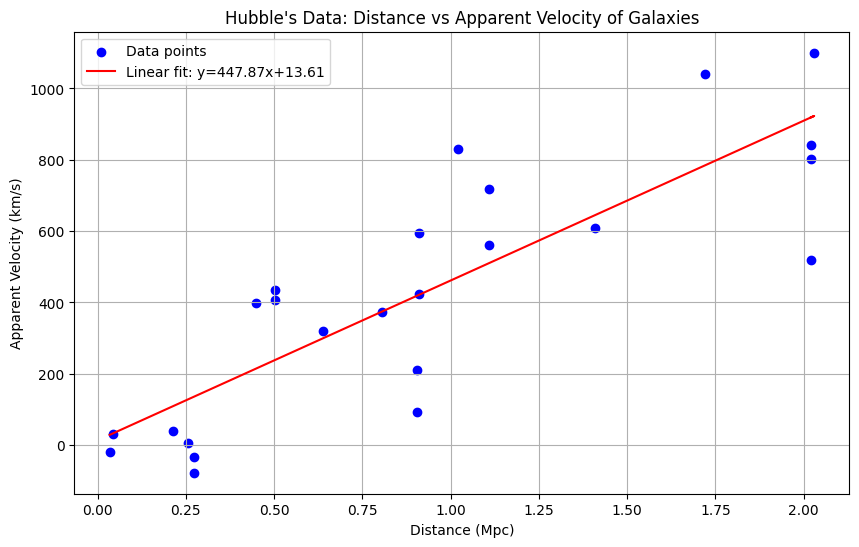

In [7]:
# Step 2: Computing the correlation coefficient
correlation_coefficient = np.corrcoef(Xs, Ys)[0, 1]

# Step 3: Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(Xs, Ys)
regression_line = slope * Xs + intercept

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(Xs, Ys, color="blue", label="Data points")
plt.plot(
    Xs,
    regression_line,
    color="red",
    label=f"Linear fit: y={slope:.2f}x+{intercept:.2f}",
)
plt.title("Hubble's Data: Distance vs Apparent Velocity of Galaxies")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Apparent Velocity (km/s)")
plt.legend()
plt.grid(True)
# plt.show()

# Results
correlation_coefficient, slope, intercept, r_value**2

# 2. Correcting simple nonlinear relationships


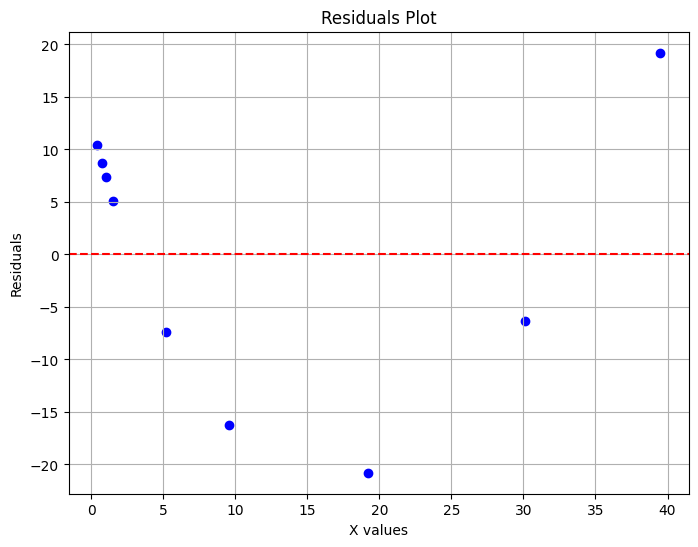

In [24]:
# Given data
Xs = np.array([0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5])
Ys = np.array([0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(Xs, Ys)

# Calculate predicted Y values
Ys_pred = slope * Xs + intercept

# Calculate residuals
residuals = Ys - Ys_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(Xs, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residuals Plot")
plt.xlabel("X values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

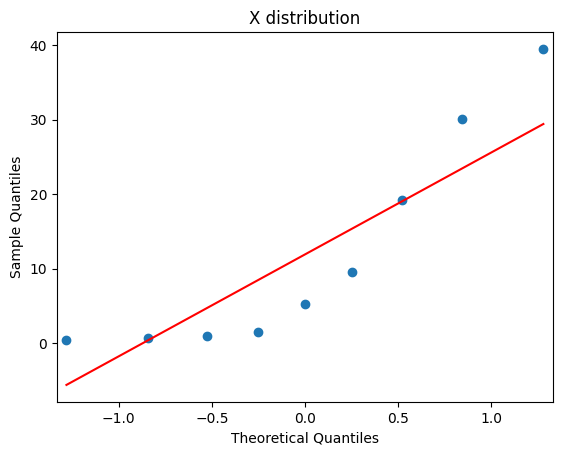

In [27]:
import statsmodels.api as sm

sm.qqplot(Xs, line="s")
plt.title("X distribution")
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Given data
Xs = np.array([0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5])
Ys = np.array([0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248])

# Option 1: No transformation
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = linregress(Xs, Ys)
Ys_pred_1 = slope_1 * Xs + intercept_1
residuals_1 = Ys - Ys_pred_1
r_squared_1 = r_value_1**2

# Option 2: Y_i' = ln(Y_i)
Ys_transformed = np.log(Ys)
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = linregress(Xs, Ys_transformed)
Ys_pred_2 = slope_2 * Xs + intercept_2
residuals_2 = Ys_transformed - Ys_pred_2
r_squared_2 = r_value_2**2

# Option 3: X_i' = ln(X_i)
Xs_transformed = np.log(Xs)
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = linregress(Xs_transformed, Ys)
Ys_pred_3 = slope_3 * Xs_transformed + intercept_3
residuals_3 = Ys - Ys_pred_3
r_squared_3 = r_value_3**2

# Option 4: X_i' = ln(X_i), Y_i' = ln(Y_i)
slope_4, intercept_4, r_value_4, p_value_4, std_err_4 = linregress(
    Xs_transformed, Ys_transformed
)
Ys_pred_4 = slope_4 * Xs_transformed + intercept_4
residuals_4 = Ys_transformed - Ys_pred_4
r_squared_4 = r_value_4**2

# Option 5: Y_i' = Y^2
Ys_squared = Ys**2
slope_5, intercept_5, r_value_5, p_value_5, std_err_5 = linregress(Xs, Ys_squared)
Ys_pred_5 = slope_5 * Xs + intercept_5
residuals_5 = Ys_squared - Ys_pred_5
r_squared_5 = r_value_5**2

# Print R-squared values
print("R-squared values:")
print("Option 1: No transformation - R-squared =", r_squared_1)
print("Option 2: Y_i' = ln(Y_i) - R-squared =", r_squared_2)
print("Option 3: X_i' = ln(X_i) - R-squared =", r_squared_3)
print("Option 4: X_i' = ln(X_i), Y_i' = ln(Y_i) - R-squared =", r_squared_4)
print("Option 5: Y_i' = Y^2 - R-squared =", r_squared_5)

R-squared values:
Option 1: No transformation - R-squared = 0.9777893212268094
Option 2: Y_i' = ln(Y_i) - R-squared = 0.7983185541651426
Option 3: X_i' = ln(X_i) - R-squared = 0.6814679274499694
Option 4: X_i' = ln(X_i), Y_i' = ln(Y_i) - R-squared = 0.9999996170204593
Option 5: Y_i' = Y^2 - R-squared = 0.8454254156571107


In [31]:
import numpy as np
from scipy.optimize import curve_fit

# Given data
Xs = np.array([0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5])
Ys = np.array([0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248])

# Transform data
Xs_transformed = np.log(Xs)
Ys_transformed = np.log(Ys)


# Fit transformed model
def model(X, kappa, omega):
    return kappa * X + np.log(omega)


params, _ = curve_fit(model, Xs_transformed, Ys_transformed)

kappa = params[0]

print("Value of kappa:", round(kappa, 2))

Value of kappa: 1.5


## Exoplanet mass data
For this exercise, we will perform multiple linear regression on some exoplanetary data to see if we can find a relationship that can predict the mass of an exoplanet.

Choice of variable transformation.

All of these observed quantities have been transformed by taking the natural logarithm. When performing linear regression, it can help to have a general idea on how the predictors contribute to the predicted quantity.

For example, if one were attempting to predict the sales of a store based on the population of surrounding region, then we might expect that the sales will be cumulative in the population variables. In this case, it would be best to leave these variables as they are, performing the linear regression directly on them.

However, in astronomy and physics, it is very common for the predicted variable to be multiplicative in the predictors. For example, the power that a solar cell produces is the product of the amount of solar radiation and the efficiency of the cell. In that case, it is better to transform the variables by taking the logarithm as discussed previously.

LogPlanetMass is the logarithm of the observed exoplanet's mass in units of Jupiter's mass. A LogPlanetMass of zero is an exoplanet with the same mass as Jupiter. Jupiter is used as a convenient comparison, as large gas giants are the most easily detected, and thus most commonly observed, kind of exoplanet. LogPlanetRadius is the logarithm of the observed exoplanet's radius in units of Jupiter's radius, for much the same reason. LogPlanetOrbit is the logarithm of the observed planet's semi-major axis of orbit, in units of AU. StarMetallicity is the relative amount of metals observed in the parent star. It is equal to the logarithm of the ratio of the observed abundance of metal to the observed abundance of metal in the Sun. The Sun is a quite average star, so it serves as a good reference point. The most common metal to measure is Iron, but astronomers define any element that isn't Hydrogen or Helium as a metal. LogStarMass is the logarithm of the parent star's mass in units of the Sun's mass. LogStarAge is the logarithm of the parent star's age in giga-years.

Let [mathjaxinline]\mathrm{{\boldsymbol y}}[/mathjaxinline] be the vector of LogPlanetMass. Then place the remaining variables so that they form columns of [mathjaxinline]{\boldsymbol X}[/mathjaxinline]. You should also insert an additional column of ones to allow for an intercept, thus you will have six [mathjaxinline]\beta[/mathjaxinline] parameters.

The lay-out of [mathjaxinline]{\boldsymbol X}[/mathjaxinline] should be, left-to-right: intercept, LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge.

In [32]:
import numpy as np

LogPlanetMass = np.array(
    [
        -0.31471074,
        1.01160091,
        0.58778666,
        0.46373402,
        -0.01005034,
        0.66577598,
        -1.30933332,
        -0.37106368,
        -0.40047757,
        -0.27443685,
        1.30833282,
        -0.46840491,
        -1.91054301,
        0.16551444,
        0.78845736,
        -2.43041846,
        0.21511138,
        2.29253476,
        -2.05330607,
        -0.43078292,
        -4.98204784,
        -0.48776035,
        -1.69298258,
        -0.08664781,
        -2.28278247,
        3.30431931,
        -3.27016912,
        1.14644962,
        -3.10109279,
        -0.61248928,
    ]
)

LogPlanetRadius = np.array(
    [
        0.32497786,
        0.34712953,
        0.14842001,
        0.45742485,
        0.1889661,
        0.06952606,
        0.07696104,
        0.3220835,
        0.42918163,
        -0.05762911,
        0.40546511,
        0.19227189,
        -0.16251893,
        0.45107562,
        0.3825376,
        -0.82098055,
        0.10436002,
        0.0295588,
        -1.17921515,
        0.55961579,
        -2.49253568,
        0.11243543,
        -0.72037861,
        0.36464311,
        -0.46203546,
        0.13976194,
        -2.70306266,
        0.12221763,
        -2.41374014,
        0.35627486,
    ]
)

LogPlanetOrbit = np.array(
    [
        -2.63108916,
        -3.89026151,
        -3.13752628,
        -2.99633245,
        -3.12356565,
        -2.33924908,
        -2.8507665,
        -3.04765735,
        -2.84043939,
        -3.19004544,
        -3.14655516,
        -3.13729584,
        -3.09887303,
        -3.09004295,
        -3.16296819,
        -2.3227878,
        -3.77661837,
        -2.52572864,
        -4.13641734,
        -3.05018846,
        -2.40141145,
        -3.14795149,
        -0.40361682,
        -3.2148838,
        -2.74575207,
        -3.70014265,
        -1.98923527,
        -3.35440922,
        -1.96897409,
        -2.99773428,
    ]
)

StarMetallicity = np.array(
    [
        0.11,
        -0.002,
        -0.4,
        0.01,
        0.15,
        0.22,
        -0.01,
        0.02,
        -0.06,
        -0.127,
        0.0,
        0.12,
        0.27,
        0.09,
        -0.077,
        0.3,
        0.14,
        -0.07,
        0.19,
        -0.02,
        0.12,
        0.251,
        0.07,
        0.16,
        0.19,
        0.052,
        -0.32,
        0.258,
        0.02,
        -0.17,
    ]
)

LogStarMass = np.array(
    [
        0.27002714,
        0.19144646,
        -0.16369609,
        0.44468582,
        0.19227189,
        0.01291623,
        0.0861777,
        0.1380213,
        0.49469624,
        -0.43850496,
        0.54232429,
        0.02469261,
        0.07325046,
        0.42133846,
        0.2592826,
        -0.09431068,
        -0.24846136,
        -0.12783337,
        -0.07364654,
        0.26159474,
        0.07603469,
        -0.07796154,
        0.09440068,
        0.07510747,
        0.17395331,
        0.28893129,
        -0.21940057,
        0.02566775,
        -0.09211529,
        0.16551444,
    ]
)

LogStarAge = np.array(
    [
        1.58103844,
        1.06471074,
        2.39789527,
        0.72754861,
        0.55675456,
        1.91692261,
        1.64865863,
        1.38629436,
        0.77472717,
        1.36097655,
        0.0,
        1.80828877,
        1.7837273,
        0.64185389,
        0.69813472,
        2.39789527,
        -0.35667494,
        1.79175947,
        1.90210753,
        1.39624469,
        1.84054963,
        2.19722458,
        1.89761986,
        1.84054963,
        0.74193734,
        0.55961579,
        1.79175947,
        0.91629073,
        2.17475172,
        1.36097655,
    ]
)

N = 30

# Organize data into design matrix X and target vector y
X = np.vstack(
    (
        np.ones(N),
        LogPlanetRadius,
        LogPlanetOrbit,
        StarMetallicity,
        LogStarMass,
        LogStarAge,
    )
).T
y = LogPlanetMass

# Compute the estimate of beta using least squares regression
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Round beta_hat to three significant figures
beta_hat_rounded = np.round(beta_hat, 3)

beta_hat_rounded

array([ 0.154,  1.402, -0.141, -1.6  , -0.956, -0.462])